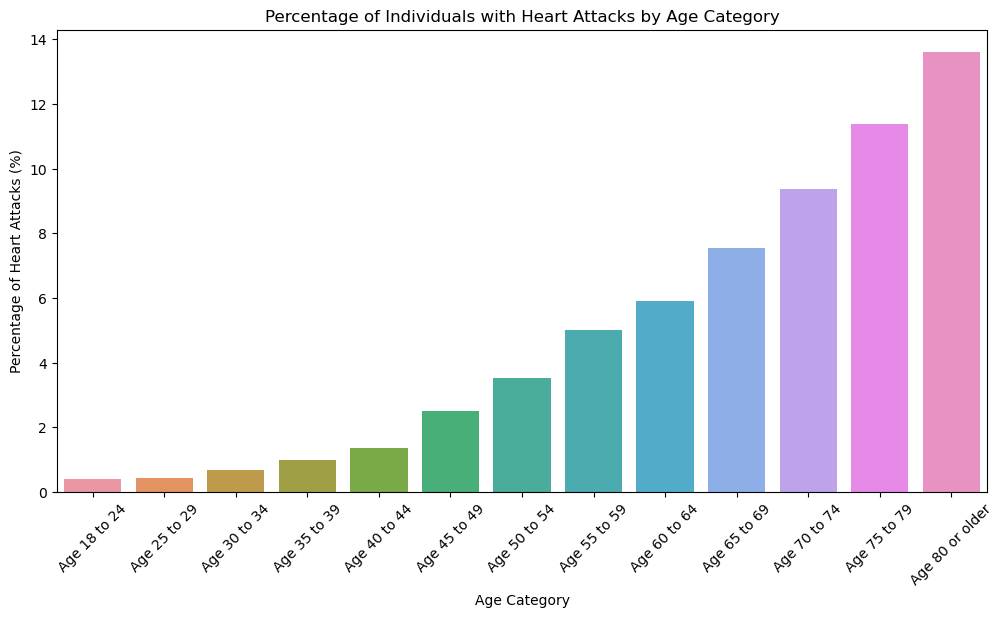

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("C:\\Users\\hunte\\Downloads\\22年数据集.csv")

# 确保AgeCategory字段是分类数据
df['AgeCategory'] = df['AgeCategory'].astype('category')

# 将HadHeartAttack字段转换为二进制数据，Yes=1，No=0
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# 计算每个年龄组中心脏病患者的比例
heart_attack_percentage = df.groupby('AgeCategory')['HadHeartAttack'].mean()

# 可视化结果
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_attack_percentage.index, y=heart_attack_percentage.values * 100)  # 将比例转换为百分比
plt.title('Percentage of Individuals with Heart Attacks by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.xticks(rotation=45)  # 旋转x轴标签，以便更容易阅读
plt.show()

C:\Users\hunte\AppData\Local\Temp\ipykernel_15972\2169124075.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x=heart_attack_percentage.index, y=heart_attack_percentage.values * 100, ci=None)


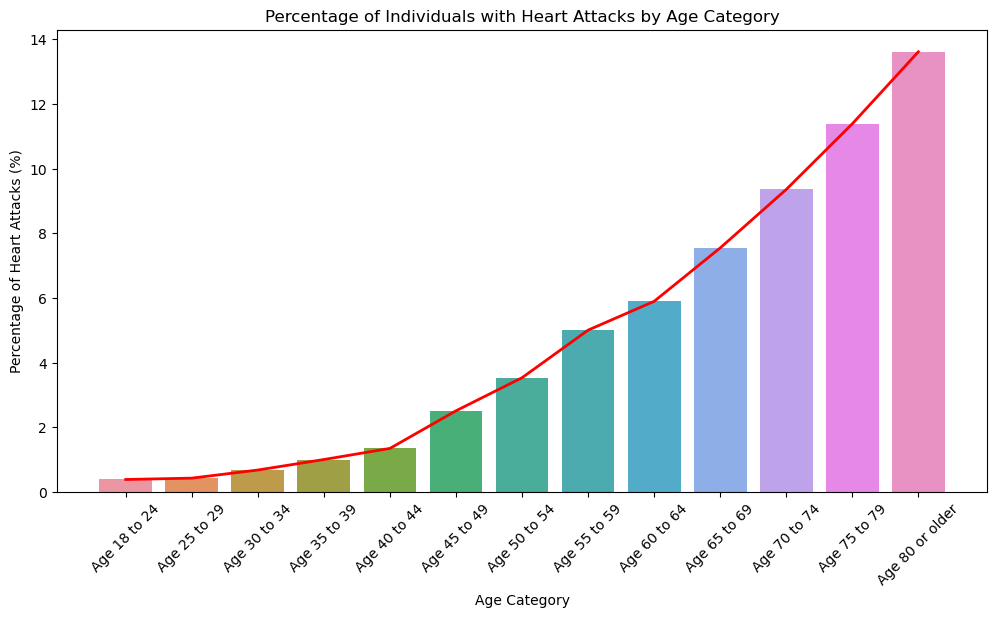

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
df = pd.read_csv("C:\\Users\\hunte\\Downloads\\22年数据集.csv")

# 确保AgeCategory字段是分类数据
df['AgeCategory'] = df['AgeCategory'].astype('category')

# 将HadHeartAttack字段转换为二进制数据，Yes=1，No=0
df['HadHeartAttack'] = df['HadHeartAttack'].map({'Yes': 1, 'No': 0})

# 计算每个年龄组中心脏病患者的比例
heart_attack_percentage = df.groupby('AgeCategory')['HadHeartAttack'].mean()

# 对年龄组进行排序，以获得连续的x轴
sorted_categories = heart_attack_percentage.sort_index().index

# 计算每个年龄组的人数，用于计算比例
group_sizes = df['AgeCategory'].value_counts(sort=False)

# 绘制条形图
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=heart_attack_percentage.index, y=heart_attack_percentage.values * 100, ci=None)

# 绘制折线图连接条形图顶部
lineplot, = plt.plot(sorted_categories, heart_attack_percentage.values * 100, linewidth=2, color='red')

# 为图表添加标题和标签
plt.title('Percentage of Individuals with Heart Attacks by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Percentage of Heart Attacks (%)')
plt.xticks(rotation=45)


# 显示图表
plt.show()

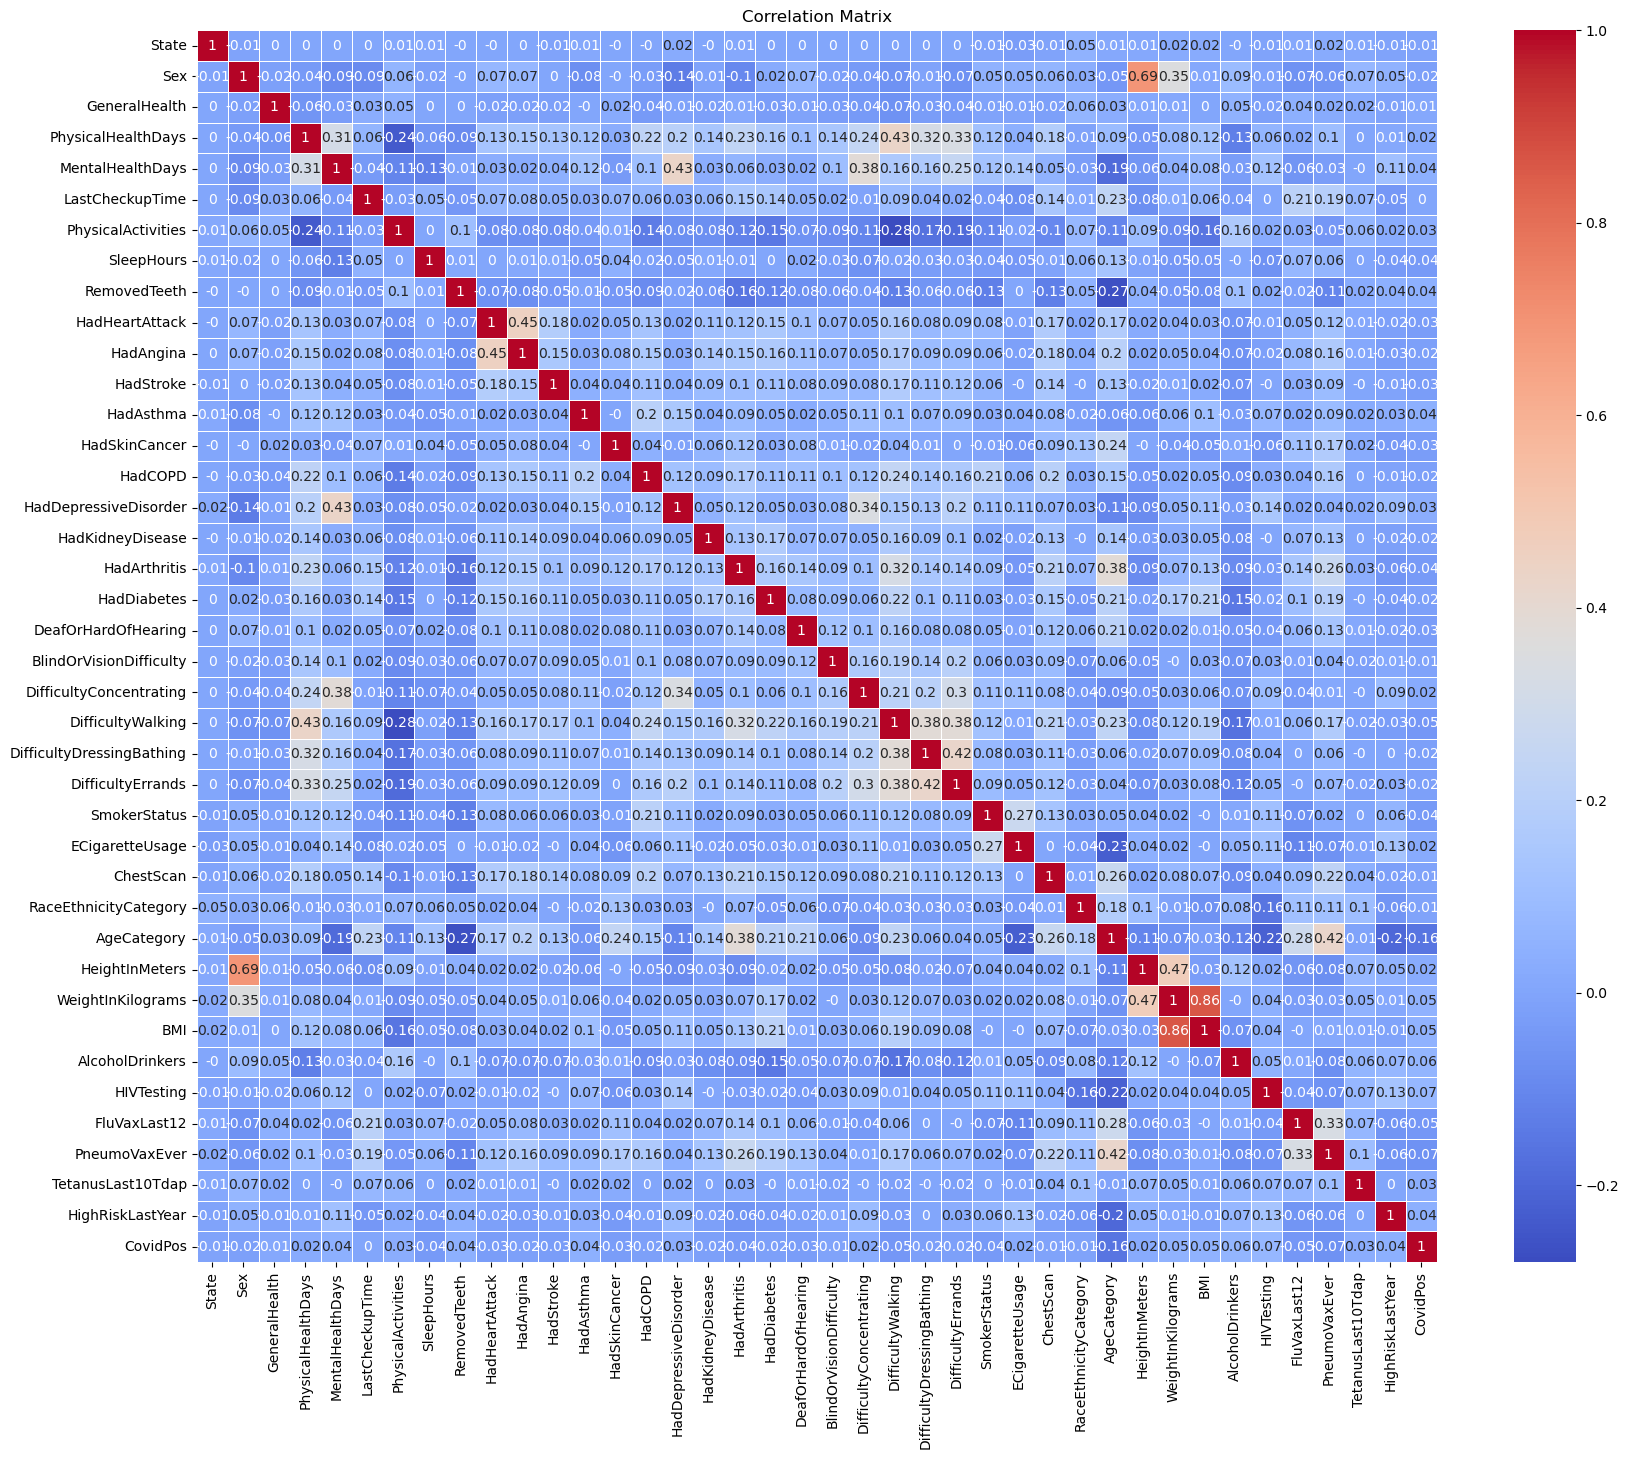

In [29]:


import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
import zipfile  
import os  
import io  

csv_file_path=(".vscode\\vs\\2024Research_SU\\Data\\2022\\2022_no_nans\\heart_2022_no_nans.csv") 
df = pd.read_csv(csv_file_path)   

data_path = ".vscode\\vs\\2024Research_SU\\Data\\2022\\2022_no_nans\\heart_2022_no_nans.csv"
data = pd.read_csv(data_path)
# 使用pandas读取解包后的CSV文件  
heat_copy = data.copy()
def encode(data):
    # Define special mappings
    special_mappings = {
    'HadHeartAttack': {'No': 0, 'Yes': 1},
    'HadAngina': {'No': 0, 'Yes': 1},
    'HadStroke': {'No': 0, 'Yes': 1},
    'HadAsthma': {'No': 0, 'Yes': 1},
    'HadSkinCancer': {'No': 0, 'Yes': 1},
    'HadCOPD': {'No': 0, 'Yes': 1},
    'HadDepressiveDisorder': {'No': 0, 'Yes': 1},
    'HadKidneyDisease': {'No': 0, 'Yes': 1},
    'HadArthritis': {'No': 0, 'Yes': 1},
    'HadDiabetes': {'No': 0, 'Yes': 1},
    'DeafOrHardOfHearing': {'No': 0, 'Yes': 1},
    'BlindOrVisionDifficulty': {'No': 0, 'Yes': 1},
    'DifficultyConcentrating': {'No': 0, 'Yes': 1},
    'DifficultyWalking': {'No': 0, 'Yes': 1},
    'DifficultyDressingBathing': {'No': 0, 'Yes': 1},
    'DifficultyErrands': {'No': 0, 'Yes': 1},
    'SmokerStatus': {'Never smoked': 0, 'Former smoker': 1, 'Current smoker - now smokes every day': 2, 'Current smoker - now smokes some days': 3},
    'ECigaretteUsage': {'Never used e-cigarettes in my entire life': 0, 'Not at all (right now)': 1, 'Use them some days': 2},
    'ChestScan': {'No': 0, 'Yes': 1},
    'AlcoholDrinkers': {'No': 0, 'Yes': 1},
    'HIVTesting': {'No': 0, 'Yes': 1},
    'FluVaxLast12': {'No': 0, 'Yes': 1},
    'PneumoVaxEver': {'No': 0, 'Yes': 1},
    'TetanusLast10Tdap': {'No, did not receive any tetanus shot in the past 10 years': 0, 'Yes, received Tdap': 1, 'Yes, received tetanus shot but not sure what type': 2, 'No, did not receive any tetanus shot': 3},
    'HighRiskLastYear': {'No': 0, 'Yes': 1},
    'CovidPos': {'No': 0, 'Yes': 1, 'Tested positive using home test without a health professional': 2}
    }

    for column in data.select_dtypes('object').columns:
        if column in special_mappings:
            data[column] = data[column].map(special_mappings[column])
        else:
            data[column] = data[column].astype('category').cat.codes
    return data
encoded_data = encode(heat_copy)
corr = encoded_data.corr().round(2)
plt.figure(figsize=(20, 16))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()